In [ ]:
# Decodes of CA and San Joaquin Valley Counties
ca_code = "06"
fresno_code = "019"
kern_code = "029"
kings_code = "031"
madera_code = "039"
merced_code = "047"
san_joaquin_code = "077"
stanislaus_code = "099"
tulare_code = "107"

In [ ]:
# Decodes of Pollutants
pm25 = "88101"
pm10 = "81102"
ozone = "44201"
no2 = "42602"
co = "42101"
so2 = "42401"

wind_speed = "61101"
wind_direction = "61102"
temperature = "62101"
rel_humidity = "62201"


In [ ]:
# import the libraries
import requests
import pandas as pd
import time

# show all columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)           # No line wrapping
pd.set_option('display.max_colwidth', None)


In [ ]:
import time
import requests
import pandas as pd

county_codes = [fresno_code, kern_code, kings_code, madera_code, merced_code, san_joaquin_code, stanislaus_code, tulare_code]

# Initialize an empty DataFrame
sjv_pm25_df = pd.DataFrame()

# Loop over the years (you can specify a range of years, for example, from 2020 to 2024)
years = range(1999, 2025)

# Loop over the years
for year in years:
    # Loop over the counties
    for county_code in county_codes:
        url = f"https://aqs.epa.gov/data/api/dailyData/byCounty?email=munkh-erdene.khuderbaatar@sjsu.edu&key=bluebird66&param={pm25}&bdate={str(year) + '0101'}&edate={str(year) + '1231'}&state={ca_code}&county={county_code}"

        try:
            # Make the request
            response = requests.get(url)
            data = response.json()
            if data.get('Header', [])[0]['status'] == "Success":
                # Normalize the JSON data into a flat DataFrame
                county_data = pd.json_normalize(data.get('Data', []))

                # Concatenate this county's data with the main DataFrame
                sjv_pm25_df = pd.concat([sjv_pm25_df, county_data], ignore_index=True)
                print(f"Added data for county {county_code} for year {year}")
            else:
                print(f"No data for county {county_code} for year {year}")

        except requests.exceptions.RequestException as e:
            print(f"Request failed for county {county_code} for year {year}: {e}")

        # Wait for a short time before the next request (6 seconds)
        time.sleep(6)
print("Complete")

Added data for county 019 for year 1999
Added data for county 029 for year 1999
Added data for county 031 for year 1999
No data for county 039 for year 1999
Added data for county 047 for year 1999
Added data for county 077 for year 1999
Added data for county 099 for year 1999
Added data for county 107 for year 1999
Added data for county 019 for year 2000
Added data for county 029 for year 2000
Added data for county 031 for year 2000
No data for county 039 for year 2000
Added data for county 047 for year 2000
Added data for county 077 for year 2000
Added data for county 099 for year 2000
Added data for county 107 for year 2000
Added data for county 019 for year 2001
Added data for county 029 for year 2001
Added data for county 031 for year 2001
No data for county 039 for year 2001
Added data for county 047 for year 2001
Added data for county 077 for year 2001
Added data for county 099 for year 2001
Added data for county 107 for year 2001
Added data for county 019 for year 2002
Added dat

In [ ]:
sjv_pm25_df = pd.read_csv("sjv_pm25.csv")

<ipython-input-4-ffe84a1d67d0>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sjv_pm25_df = pd.read_csv("sjv_pm25.csv")


In [ ]:
sjv_pm25_df

,date_local,site_number,latitude,longitude,aqi
0,1999-01-03,4,36.102244,-119.565650,71.0
1,1999-01-03,5,37.642165,-120.994212,122.0
2,1999-01-03,8,36.781333,-119.773190,119.0
3,1999-01-03,10,35.385574,-119.015009,139.0
4,1999-01-03,11,35.050551,-118.147294,27.0
...,...,...,...,...,...
107957,2024-12-31,2016,36.710833,-119.777500,85.0
107958,2024-12-31,2024,37.289732,-120.429718,56.0
107959,2024-12-31,2510,37.308320,-120.480456,60.0
107960,2024-12-31,5001,36.819449,-119.716433,62.0


In [ ]:
sjv_pm25_df = sjv_pm25_df.groupby(['date_local', 'site_number', 'latitude', 'longitude'])["aqi"].mean().reset_index()

In [ ]:
sjv_pm25_df

,date_local,site_number,latitude,longitude,aqi
0,1999-01-03,4,36.102244,-119.565650,71.0
1,1999-01-03,5,37.642165,-120.994212,122.0
2,1999-01-03,8,36.781333,-119.773190,119.0
3,1999-01-03,10,35.385574,-119.015009,139.0
4,1999-01-03,11,35.050551,-118.147294,27.0
...,...,...,...,...,...
107957,2024-12-31,2016,36.710833,-119.777500,85.0
107958,2024-12-31,2024,37.289732,-120.429718,56.0
107959,2024-12-31,2510,37.308320,-120.480456,60.0
107960,2024-12-31,5001,36.819449,-119.716433,62.0


In [ ]:
# drop na in aqi column
sjv_pm25_df = sjv_pm25_df.dropna(subset=["aqi"])

As the monitors are not too clustered, we can apply the Kriging model

In [ ]:
pip install libpysal esda splot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 25.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import DistanceBand
from esda.moran import Moran

In [ ]:
sjv_pm25_df["date_local"] = pd.to_datetime(sjv_pm25_df["date_local"])

<ipython-input-13-b945ae0a59b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# extract year
sjv_pm25_df['year'] = sjv_pm25_df['date_local'].dt.year

<ipython-input-14-0d0d68c109f8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
sjv_pm25_2024 = sjv_pm25_df[sjv_pm25_df["year"] == 2024]

In [ ]:
sjv_pm25_2023 = sjv_pm25_df[sjv_pm25_df["year"] == 2023]

In [ ]:
sjv_pm25_2022 = sjv_pm25_df[sjv_pm25_df["year"] == 2022]

In [ ]:
geometry = [Point(xy) for xy in zip(sjv_pm25_2024['longitude'], sjv_pm25_2024['latitude'])]
gdf = gpd.GeoDataFrame(sjv_pm25_2024, geometry=geometry)

In [ ]:
from scipy.spatial import distance_matrix
import numpy as np

# Assuming your GeoDataFrame is in EPSG:4326 (lat/lon)
coords = gdf[["latitude", "longitude"]].to_numpy()
dist_matrix = distance_matrix(coords, coords)

# Get the upper triangle (excluding 0s on the diagonal)
dists = dist_matrix[np.triu_indices_from(dist_matrix, k=1)]

print("Min distance:", dists.min())
print("Max distance:", dists.max())
print("Mean distance:", dists.mean())
print("Median distance:", np.median(dists))

Min distance: 0.0
Max distance: 4.253810799780479
Mean distance: 1.4076017973070754
Median distance: 1.280668770902541


In [ ]:
threshold = 0.8
w = DistanceBand.from_dataframe(gdf, threshold=threshold, silence_warnings=True)
print("Isolated points:", w.islands)

In [ ]:
w = DistanceBand.from_dataframe(gdf, threshold=0.8, silence_warnings=True)
neighbor_counts = [len(w.neighbors[i]) for i in range(len(w.neighbors))]
print("Min neighbors per point:", min(neighbor_counts))
print("Avg neighbors per point:", sum(neighbor_counts)/len(neighbor_counts))


KeyError: 0

In [ ]:
moran = Moran(gdf['aqi'], w)
print("Moran's I:", moran.I)
print("p-value:", moran.p_sim)

Moran's I: 0.10791579606116948
p-value: 0.001


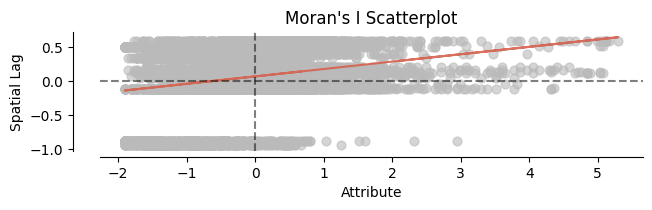

In [ ]:
from esda.moran import Moran
import seaborn as sns
import matplotlib.pyplot as plt
import splot.esda as esda_plot

# Moran calculation
w = DistanceBand.from_dataframe(gdf, threshold=0.8, silence_warnings=True)
mi = Moran(gdf["aqi"], w)

# Scatterplot
esda_plot.moran_scatterplot(mi)
plt.title("Moran's I Scatterplot")
plt.show()

Positive slope → positive autocorrelation (similar values cluster).
Most points close to the diagonal → strong global pattern.

Top-right (HH)	High AQI, high neighbors	Pollution hotspots – clustered high values.
Bottom-left (LL)	Low AQI, low neighbors	Clean spots – clustered low values.
Top-left (LH)	Low AQI, high neighbors	Spatial outliers (low in high region).
Bottom-right (HL)	High AQI, low neighbors	Spatial outliers (high in low region).



In [ ]:
morans_i_list = []

for date, group in sjv_pm25_2024.groupby('date_local'):
    coords = list(zip(group['longitude'], group['latitude']))
    w = DistanceBand(coords, threshold=0.8, binary=True, silence_warnings=True)
    mi = Moran(group['aqi'], w)

    morans_i_list.append({
        'date': date,
        'moran_i': mi.I,
        'p_value': mi.p_sim
    })

morans_df_2024 = pd.DataFrame(morans_i_list)


In [ ]:
morans_i_list = []

for date, group in sjv_pm25_2023.groupby('date_local'):
    coords = list(zip(group['longitude'], group['latitude']))
    w = DistanceBand(coords, threshold=0.8, binary=True, silence_warnings=True)
    mi = Moran(group['aqi'], w)

    morans_i_list.append({
        'date': date,
        'moran_i': mi.I,
        'p_value': mi.p_sim
    })

morans_df_2023 = pd.DataFrame(morans_i_list)


In [ ]:
morans_i_list = []

for date, group in sjv_pm25_2022.groupby('date_local'):
    coords = list(zip(group['longitude'], group['latitude']))
    w = DistanceBand(coords, threshold=0.8, binary=True, silence_warnings=True)
    mi = Moran(group['aqi'], w)

    morans_i_list.append({
        'date': date,
        'moran_i': mi.I,
        'p_value': mi.p_sim
    })

morans_df_2022 = pd.DataFrame(morans_i_list)


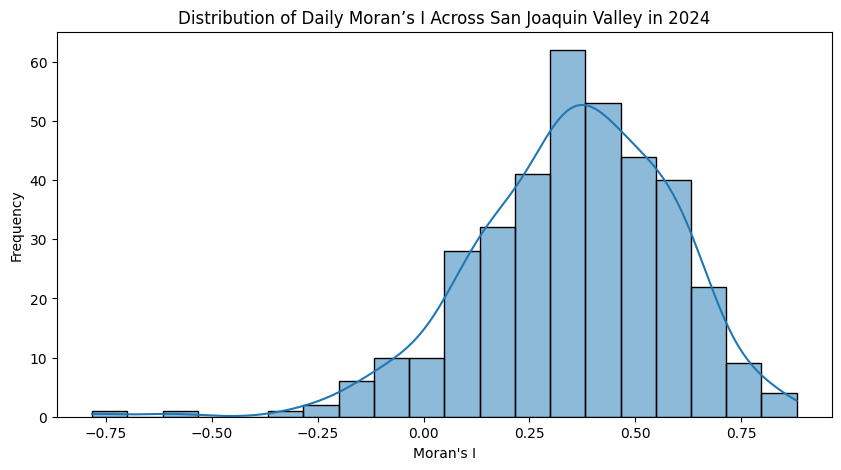

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(morans_df_2024['moran_i'], bins=20, kde=True)
plt.title("Distribution of Daily Moran’s I Across San Joaquin Valley in 2024")
plt.xlabel("Moran's I")
plt.ylabel("Frequency")
plt.show()